# Chapter 10: Options and Futures

In modern finance, the option theory (including futures and forwards) and its
applications play an important role. Many trading strategies, corporate incentive
plans, and hedging strategies include various types of options. For example, many
executive incentive plans are based on stock options. Assume that an importer
located in the US has just ordered a piece of machinery from England with a
payment of £10 million in three months. The importer has a currency risk (or
exchange rate risk). If the pound depreciates against the US dollar, the importer
would be better off since he/she pays less US dollars to buy £10 million. On the
contrary, if the pound appreciates against the US dollar, then the importer would
suffer a loss. There are several ways that the importer could avoid or reduce such
a risk: buy pounds right now, enter a futures market to buy pounds with a fixed
exchange rate determined today, or long a call option with a fixed exercise price.
In this chapter, we will explain the option theory and its related applications. In
particular, the following topics will be covered:

• How to hedge currency risk, a market-wide short-term downturn

• Payoff and profit/loss functions for calls and puts and their graphical
representations

• European versus American options

• Normal distribution, standard normal distribution, and cumulative
normal distribution

• Black-Scholes-Merton option model with/without dividend

• Various trading strategies and their visual presentations, such as covered
call, straddle, butterfly, and calendar spread

• Delta, gamma, and other Greeks

• The put-call parity and its graphical representation

• Graphical representation for a one-step and a two-step binomial tree model

• Using the binomial tree method to price both European and American options

• Implied volatility, volatility smile and skewness

Options theory is an integral part of finance theory. It is difficult to image that
a finance student would not understand it. However, it is quite demanding to
comprehend the theory thoroughly. Many finance-major students view options
theory as rocket science, since it involves how to solve various differential equations.
In order to satisfy as many readers as possible, in this chapter we avoid complex
mathematical derivations.

An option would give the option buyer a right to buy or sell something in the future
with a fixed price determined today. If the buyer has a right to buy something in
the future, it is called a call option. If the option buyer is entitled to sell something,
it is called a put option. Since there are two persons (sides) for each transaction, the
buyer pays to acquire a right, while the seller receives cash inflow today to bear an
obligation. Unlike options, a futures contract would give the buyer and seller both
rights and obligations. Unlike options with an initial cash flow from buyer to seller,
for a futures contract, usually there is no initial cash flow. Forward contracts are
quite similar to future contracts with a few exceptions. In this chapter, these two
types of contracts (futures and forwards) are not distinguished. A forward contract
is easier to analyze than a future contract. If a reader wants a more in-depth analysis,
he/she should consult other related textbooks.

## Introducing Futures

Before discussing the basic concepts and formulas related to futures, let's review
the concept of continuously compounded interest rates. In Chapter 3, Time Value of
Money, we learned that the following formula could be applied to estimate the future
value of a given present value. 

Here, FV is the future value, PV is the present value, R is the effective period rate and
n is the number of periods. For example, assume that the Annual Percentage Rate
(APR) is 8%, compounded semiannually. If we deposit $100 today, what is its future
value in two years? The following code shows the result:

In [4]:
# This illustrates the future value calculator
import numpy_financial as npf
pv=100
APR=0.08
rate=APR/2.0

n=2
nper=n*2
fv=npf.fv(rate,nper,0,pv)
print(fv)

-116.98585600000003


The future value is $116.99. In the preceding program, the effective semiannual
rate is 4% since the APR is 8% compounded semiannually. In options theory, riskfree rates and dividend yields are defined as continuously compounded. It is easy to derive the relationship between an effective (or APR) rate and a continuously
compounded rate.

In [5]:
import numpy as np
Rc=2*np.log(1+0.04)
print(np.exp(Rc/2)-1)

0.040000000000000036


Let's now estimate the APR from the R(c) - continuously compounded rate.

For a futures contract, let's use the preceding example of an importer in the US who
is going to pay £10 million in three months. Usually, there are two ways to present
an exchange rate: value of the first currency per unit of the second currency, and the
opposite. Let's treat US as domestic and England as foreign, and the exchange rate is
quoted in dollars per pound. Assume that today the exchange rate is £1 = 1.25 USD,
the domestic interest rate is 1% and the foreign interest rate (in England) is 2%. The
following codes show how much we need today in terms of pounds and US dollars:

In [6]:
import numpy as np
amount=5
r_foreign=0.02
T=3./12. # time, in this case 3 months out of the year (12 months total)
exchangeRateToday=1.25
poundToday=5*np.exp(-r_foreign*T)
print("Pound needed today=", poundToday)
usToday=exchangeRateToday*poundToday
print("US dollar needed today", usToday)

Pound needed today= 4.975062395963412
US dollar needed today 6.218827994954265


The result shows that we would need £4.975 million today to satisfy the payment
of £5 million in three months, since we could deposit £4.975 million in a bank to
earn extra interest (at 1%). If the importer has no pounds, they could spend $6.2188
million US dollars to purchase the amount of pounds today. Alternatively, the
importer could long a future contract (or a few future contracts) to purchase pounds
in three months with a fixed exchange rate determined today. 

The following python program shows the future price today:

In [8]:
import numpy as np
def futuresExchangeRate(s0,rateDomestic,rateForeign,T):
    '''Takes an exchange rate s0, a domestic interest rate, a foreign interest rate, and a time measure (as a fraction of a year).
        Returns the future exchange rate between the two currencies.'''
    futureEx=s0*np.exp((rateDomestic-rateForeign)*T)
    return futureEx

s0=1.25
rHome=0.01
rForeigh=0.02
T=3./12.
#
futures=futuresExchangeRate(s0,rHome,rForeigh,T)
print("futures=",futures)

futures= 1.246878902996825


Based on the result, the exchange rate in three months should be 1.2468789 US
dollars per pound. In other words, US dollars should have depreciated against the
British pound. The reason is based on the two interest rates. Here is the logic based
on the no arbitrage principle. Assume that we have $1.25 USD today. We have two
choices: deposit in a US bank to enjoy 2%, or exchange it for 1 pound and deposit
it in a foreign bank, enjoying 1%. Assume further, if the future exchange rate is not
1.246879, we would have an arbitrate opportunity. Just assume that the futures price
(for exchange rate) is $1.26 indicating that the pound is overvalued relative to the
US dollar. An arbitrator would buy low and sell high, that is, short futures. Assume
that we have one pound obligation in three months. Here is the arbitrage strategy:
borrow $1.25 (USD) and sell one pound in three months with a future price of $1.26.
At the end of three months, here is the profit of our arbitrage:

In [9]:
import numpy as np
obligationForeign=1.0 # how much to pay in 3 months
f=1.26 # future price
s0=1.25 # today's exchange rate
rHome=0.01
rForeign=0.02
T=3./12.
todayObligationForeign=obligationForeign*np.exp(-rForeign*T)
usBorrow=todayObligationForeign*s0
costDollarBorrow=usBorrow*np.exp(rHome*T)
profit=f*obligationForeign-costDollarBorrow
print("profit in USD =", profit)

profit in USD = 0.013121097003174764


The profit is 0.015 USD. If the future price is lower than 1.246878902996825, an
arbitrager would take an opposite position, that is, long a future contract.

Let's see the action of trading futures in practice. Assume John Doe is managing a portfolio worth $50
million today and his portfolio has a beta of 1.10 with S&P500. He is worried that the
market might go down in the next six months. It is not feasible to sell his portfolio or
part of it because of the transaction costs. Assume that in the short term, his target
beta is zero. For each point of S&P500, the price is $250. Since today's S&P500 is
2297.41, the value of one futures contract is $5,743,550. The number of contracts John
should short (or long) is given here:

In [10]:
import numpy as np
# input area
todaySP500index=2297.42
valuePortfolio=50e6
betaPortfolio=1.1
betaTarget=0
#
priceEachPoint=250

contractFuturesSP500=todaySP500index*priceEachPoint
n=(betaTarget-betaPortfolio)*valuePortfolio/contractFuturesSP500
print("number of contracts SP500 futures=",n)

number of contracts SP500 futures= -95.75959119359979


A negative value indicates a short position. John Doe should short 96 S&P500 futures
contracts. This is consistent with common sense, since the portfolio is positively
correlated with the S&P500 index. The following program shows the profit or loss
with and without hedging when the S&P500 index level falls 97 points:

In [12]:
# input area
import numpy as np
sp500indexToday=2297.42
valuePortfolio=50e6
betaPortfolio=1.1
betaTarget=0
sp500indexNmonthsLater=2200.0
#
priceEachPoint=250
contractFuturesSP500=sp500indexToday*priceEachPoint
n=(betaTarget-betaPortfolio)*valuePortfolio/contractFuturesSP500
mySign=np.sign(n)
n2=mySign*np.ceil(abs(n))
print("number of contracts=",n2)
# hedging result
v1=sp500indexToday
v2=sp500indexNmonthsLater
lossFromPortfolio=valuePortfolio*(v2-v1)/v1
gainFromFutures=n2*(v2-v1)*priceEachPoint
net=gainFromFutures+lossFromPortfolio
print("loss from portfolio=", lossFromPortfolio)
print("gain from futures contract=", gainFromFutures)
print("net=", net)

number of contracts= -96.0
loss from portfolio= -2120204.403200113
gain from futures contract= 2338080.000000002
net= 217875.59679988865


From the last three lines, we know that without hedging, the loss in portfolio value
would be $2.12 million. On the other hand, after shorting 96 S&P500 futures contracts,
the net loss is only $217,876 after the S&P500 index falls 98 points in six months. With
a few different potential S&P500 index levels, we could find out their related hedging
and no-hedging results. Such a hedging strategy is usually called portfolio insurance.

## Payoff and profit/loss functions for call and put options

An option gives its buyer the right to buy (call option) or sell (put option) something
in the future to the option seller at a predetermined price (exercise price).  Assume that three months later the stock price is $25. We would not
exercise our call option to pay $30 in exchange for the stock since we could buy the
same stock with $25 in the open market. On the other hand, if the stock price is $40,
we will exercise our right to reap a payoff of $10, that is, buy the stock at $30 and sell
it at $40. The following program presents the payoff function for a call:

In [13]:
def payoff_call(sT,x):
    return (sT-x+abs(sT-x))/2

Here we will illustrate how a payoff call looks graphically:

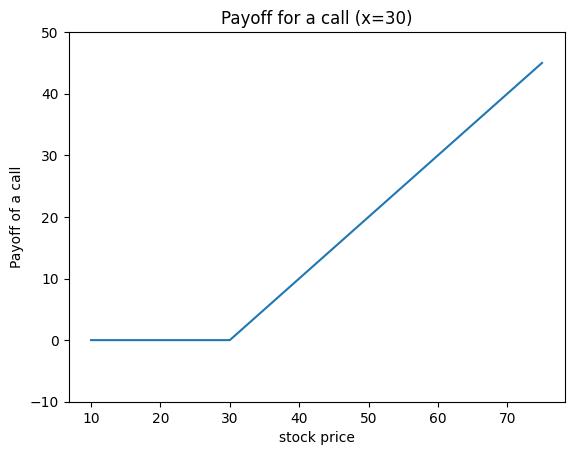

In [14]:
import numpy as np
import matplotlib.pyplot as plt
s = np.arange(10,80,5)
x=30
payoff=(abs(s-x)+s-x)/2
plt.ylim(-10,50)
plt.plot(s,payoff)
plt.title("Payoff for a call (x=30)")
plt.xlabel("stock price")
plt.ylabel("Payoff of a call")
plt.show()